In [27]:
install.packages("forecast")
library('ggplot2')
library('forecast')
library('tseries')

Installing package into ‘/usr/local/spark-2.2.0-bin-hadoop2.7/R/lib’
(as ‘lib’ is unspecified)
also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘lattice’, ‘tseries’, ‘fracdiff’, ‘nnet’, ‘lmtest’, ‘zoo’, ‘timeDate’, ‘RcppArmadillo’



In [21]:
library(SparkR)
as <- sparkR.session("local[*]")

In [28]:
history_weather = as.DataFrame(read.csv("/home/jovyan/data/weather_extract.csv"))  # read csv file
head(history_weather)

Warning message in FUN(X[[i]], ...):
“Use Site_name instead of Site.name  as column name”Warning message in FUN(X[[i]], ...):
“Use Height__m_ instead of Height..m.  as column name”

date,minimum_temperature,maximum_temperature,rainfall_mm,evaporation_mm,sunshine_hours,direction_of_maximum_wind_gust,speed_of_maximum_wind_gust_kmh,time_of_maximum_wind_gust,X9am_temperature,⋯,Site_name,Start,End,Lat,Lon,Source,STA,Height__m_,Bar_ht,WMO
2017-01-1,12.6,27.8,0.0,NA,NA,NW,37,14:42,21.0,⋯,CANBERRA AIRPORT,2008,..,-35.3088,149.2004,GPS,NSW,577.1,577.6,94926
2017-01-2,15.7,29.9,0.0,NA,NA,SE,43,16:02,19.6,⋯,CANBERRA AIRPORT,2008,..,-35.3088,149.2004,GPS,NSW,577.1,577.6,94926
2017-01-3,13.1,27.1,0.0,NA,NA,ENE,44,17:17,19.3,⋯,CANBERRA AIRPORT,2008,..,-35.3088,149.2004,GPS,NSW,577.1,577.6,94926
2017-01-4,11.0,25.1,0.0,NA,NA,E,37,16:38,17.4,⋯,CANBERRA AIRPORT,2008,..,-35.3088,149.2004,GPS,NSW,577.1,577.6,94926
2017-01-5,11.2,29.9,0.0,NA,NA,SSW,54,16:57,18.5,⋯,CANBERRA AIRPORT,2008,..,-35.3088,149.2004,GPS,NSW,577.1,577.6,94926
2017-01-6,14.5,30.6,1.4,NA,NA,ENE,43,17:54,20.3,⋯,CANBERRA AIRPORT,2008,..,-35.3088,149.2004,GPS,NSW,577.1,577.6,94926


In [45]:
#head(history_weather)
#dates <- as.Date(history_weather$date, '%Y-%m-%d')
mydates <- as.Date(c("2007-06-22", "2004-02-13"))
mydates
#ggplot(daily_data, aes(date, cnt)) + geom_line() + scale_x_date('month')  + ylab("maximum_temperature") +
#            xlab("")

[1] "2007-06-22" "2004-02-13"

In [ ]:
b2=as.Date(history_weather, format = '%Y-%m-%d')

In [58]:
data = read.csv("/home/jovyan/data/weather_extract.csv")
head(data)

date,minimum_temperature,maximum_temperature,rainfall_mm,evaporation_mm,sunshine_hours,direction_of_maximum_wind_gust,speed_of_maximum_wind_gust_kmh,time_of_maximum_wind_gust,X9am_temperature,⋯,Site.name,Start,End,Lat,Lon,Source,STA,Height..m.,Bar_ht,WMO
2017-01-1,12.6,27.8,0.0,NA,NA,NW,37,14:42,21.0,⋯,CANBERRA AIRPORT,2008,..,-35.3088,149.2004,GPS,NSW,577.1,577.6,94926
2017-01-2,15.7,29.9,0.0,NA,NA,SE,43,16:02,19.6,⋯,CANBERRA AIRPORT,2008,..,-35.3088,149.2004,GPS,NSW,577.1,577.6,94926
2017-01-3,13.1,27.1,0.0,NA,NA,ENE,44,17:17,19.3,⋯,CANBERRA AIRPORT,2008,..,-35.3088,149.2004,GPS,NSW,577.1,577.6,94926
2017-01-4,11.0,25.1,0.0,NA,NA,E,37,16:38,17.4,⋯,CANBERRA AIRPORT,2008,..,-35.3088,149.2004,GPS,NSW,577.1,577.6,94926
2017-01-5,11.2,29.9,0.0,NA,NA,SSW,54,16:57,18.5,⋯,CANBERRA AIRPORT,2008,..,-35.3088,149.2004,GPS,NSW,577.1,577.6,94926
2017-01-6,14.5,30.6,1.4,NA,NA,ENE,43,17:54,20.3,⋯,CANBERRA AIRPORT,2008,..,-35.3088,149.2004,GPS,NSW,577.1,577.6,94926


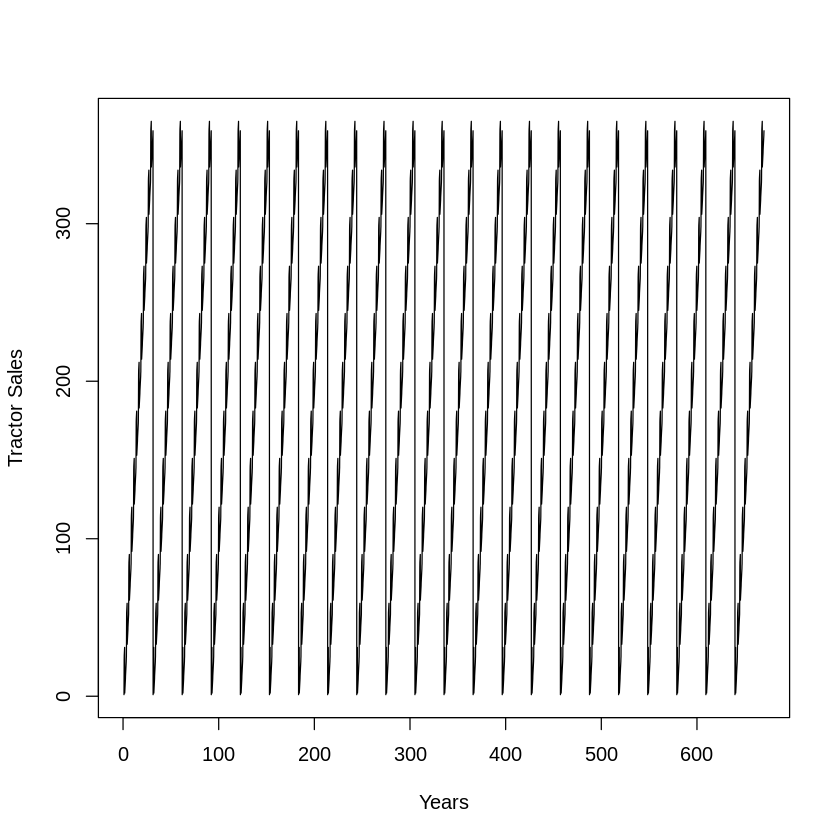

In [68]:
df2 <- subset(data, select = c(1, 2))
plott_data = ts(df2[,1],frequency = 12)
plot(plott_data, xlab='Years', ylab = 'Tractor Sales')

In [71]:
library(zoo)
z <- read.zoo(text = Lines, header = TRUE, format = "%m/%d/%Y")


Time Series:
Start = 2017 
End = 10046 
Frequency = 1 
   [1]   1  12  23  26  27  28  29  30  31   2   3   4   5   6   7   8   9  10
  [19]  11  13  14  15  16  17  18  19  20  21  22  24  25  32  43  53  54  55
  [37]  56  57  58  59  33  34  35  36  37  38  39  40  41  42  44  45  46  47
  [55]  48  49  50  51  52  60  71  82  85  86  87  88  89  90  61  62  63  64
  [73]  65  66  67  68  69  70  72  73  74  75  76  77  78  79  80  81  83  84
  [91]  91 102 113 115 116 117 118 119 120  92  93  94  95  96  97  98  99 100
 [109] 101 103 104 105 106 107 108 109 110 111 112 114 121 132 143 146 147 148
 [127] 149 150 151 122 123 124 125 126 127 128 129 130 131 133 134 135 136 137
 [145] 138 139 140 141 142 144 145 152 163 174 176 177 178 179 180 181 153 154
 [163] 155 156 157 158 159 160 161 162 164 165 166 167 168 169 170 171 172 173
 [181] 175 182 193 204 207 208 209 210 211 212 183 184 185 186 187 188 189 190
 [199] 191 192 194 195 196 197 198 199 200 201 202 203 205 206 213 224 235 2